# Install TODS

In [13]:
import warnings
warnings.filterwarnings("ignore")

!pip install -e git+https://github.com/datamllab/tods.git@dev#egg=tods 

Obtaining tods from git+https://github.com/datamllab/tods.git@dev#egg=tods
  Updating ./src/tods clone (to revision dev)
  Running command git fetch -q --tags
  Running command git reset --hard -q feb0c9c48b750c1dc4b9d60b5884b93d7824e77b
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tods
    Found existing installation: tods 0.0.2
    Uninstalling tods-0.0.2:
      Successfully uninstalled tods-0.0.2
  DEPRECATION: Legacy editable install of tods from git+https://github.com/datamllab/tods.git@dev#egg=tods (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for tods


# Load Datasets

In [53]:
import pandas as pd

gen = pd.read_csv('./Data/multivariate/Genesis/genesis-anomalies.test.csv')
dap = pd.read_csv('./Data/multivariate/Daphnet/S01R01E1.test.csv')
occ = pd.read_csv('./Data/multivariate/Occupancy/room-occupancy-0.test.csv')
cal = pd.read_csv('./Data/multivariate/CalIt2/CalIt2-traffic.test.csv')
exa = pd.read_csv('./Data/multivariate/Exathlon/2_1_100000_60-20.test.csv')

gen.drop(["timestamp"], axis = 1, inplace = True)
dap.drop(["timestamp"], axis = 1, inplace = True)
occ.drop(["timestamp"], axis = 1, inplace = True)
cal.drop(["timestamp"], axis = 1, inplace = True)
exa.drop(["timestamp"], axis = 1, inplace = True)

datasets = [gen, dap, occ, cal, exa]
problemname = ['Genesis', 'Daphnet', 'Occupancy', 'CalIt', 'Exathlon']
contamination = [0.00308261405672, 0.0699320652173913, 0.3647279549718574, 0.0408730158730158, 0.063187225377773]

In [54]:
for dataset in datasets:
    print(dataset.shape)

(16220, 19)
(73600, 10)
(2665, 6)
(5040, 3)
(46655, 13)


# Run Benchmarking Algorithms

In [57]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tods.sk_interface.detection_algorithm.PCAODetector_skinterface import PCAODetectorSKI
from tods.sk_interface.detection_algorithm.CBLOF_skinterface import CBLOFSKI
from tods.sk_interface.detection_algorithm.COF_skinterface import COFSKI
from tods.sk_interface.detection_algorithm.HBOS_skinterface import HBOSSKI
from tods.sk_interface.detection_algorithm.IsolationForest_skinterface import IsolationForestSKI
from tods.sk_interface.detection_algorithm.KNN_skinterface import KNNSKI
from tods.sk_interface.detection_algorithm.LOF_skinterface import LOFSKI
from tods.sk_interface.detection_algorithm.OCSVM_skinterface import OCSVMSKI


... Processing Genesis ...
Accuracy Score:  0.9895045531717858
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6458
           1       0.00      0.00      0.00        21

    accuracy                           0.99      6479
   macro avg       0.50      0.50      0.50      6479
weighted avg       0.99      0.99      0.99      6479

PCAODetect ROC:0.6107, precision @ rank n:0.0, execution time: 0.5295s
Accuracy Score:  0.9938347718865598
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6467
           1       0.00      0.00      0.00        21

    accuracy                           0.99      6488
   macro avg       0.50      0.50      0.50      6488
weighted avg       0.99      0.99      0.99      6488

PyodCBLOF ROC:0.9035, precision @ rank n:0.0952, execution time: 0.9913s
Accuracy Score:  0.9935265104808878
              precision    recall  f1-score   support

           

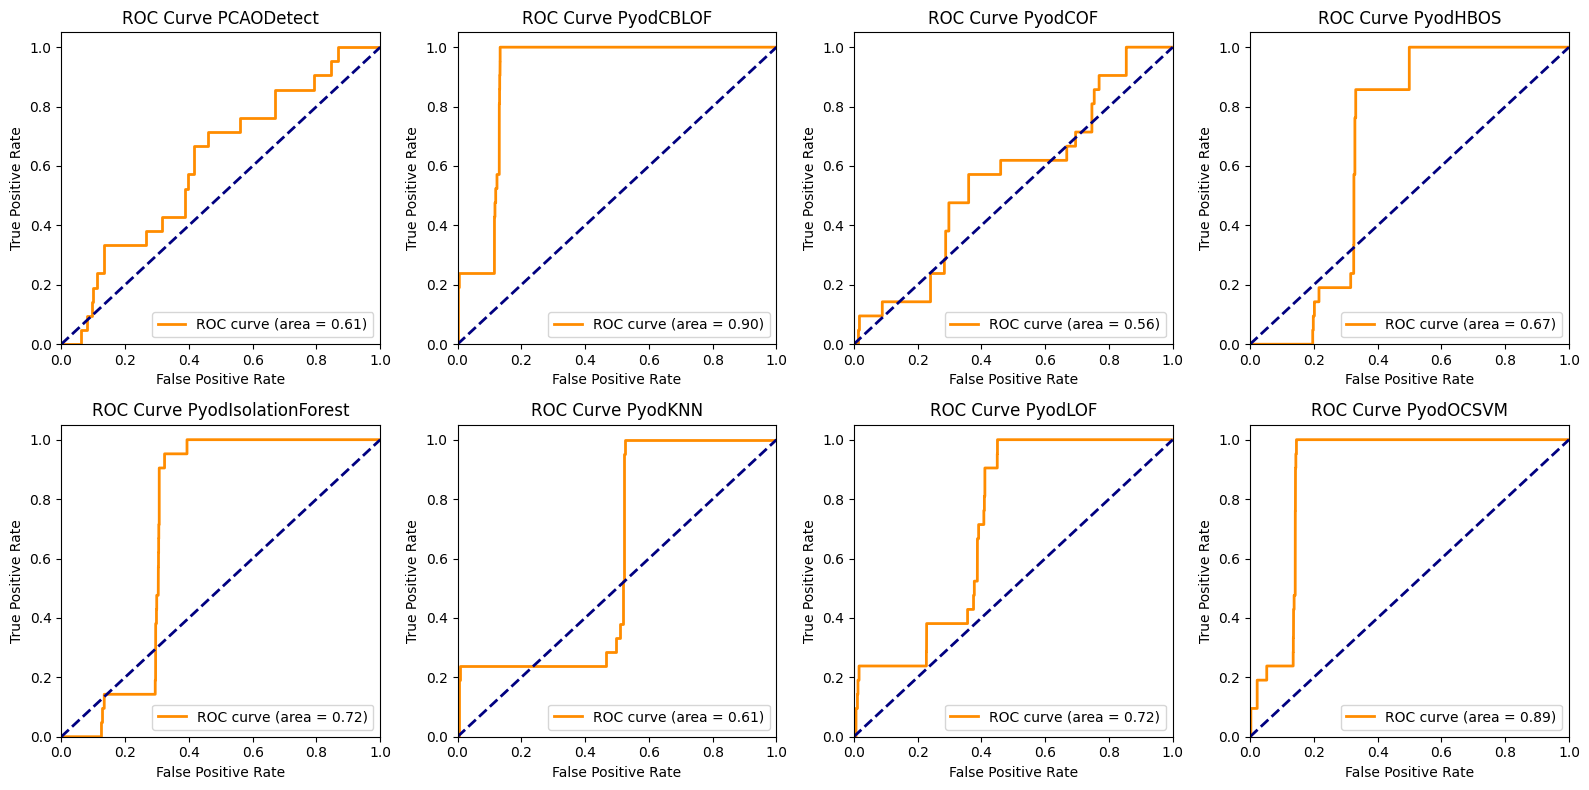


... Processing Daphnet ...
Accuracy Score:  0.8729231082871802
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27353
           1       0.08      0.08      0.08      2078

    accuracy                           0.87     29431
   macro avg       0.51      0.51      0.51     29431
weighted avg       0.87      0.87      0.87     29431

PCAODetect ROC:0.5292, precision @ rank n:0.0823, execution time: 0.9688s
Accuracy Score:  0.8764266304347826
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27362
           1       0.12      0.12      0.12      2078

    accuracy                           0.88     29440
   macro avg       0.53      0.53      0.53     29440
weighted avg       0.88      0.88      0.88     29440

PyodCBLOF ROC:0.6864, precision @ rank n:0.1232, execution time: 1.8147s
Accuracy Score:  0.8730978260869565
              precision    recall  f1-score   support

        

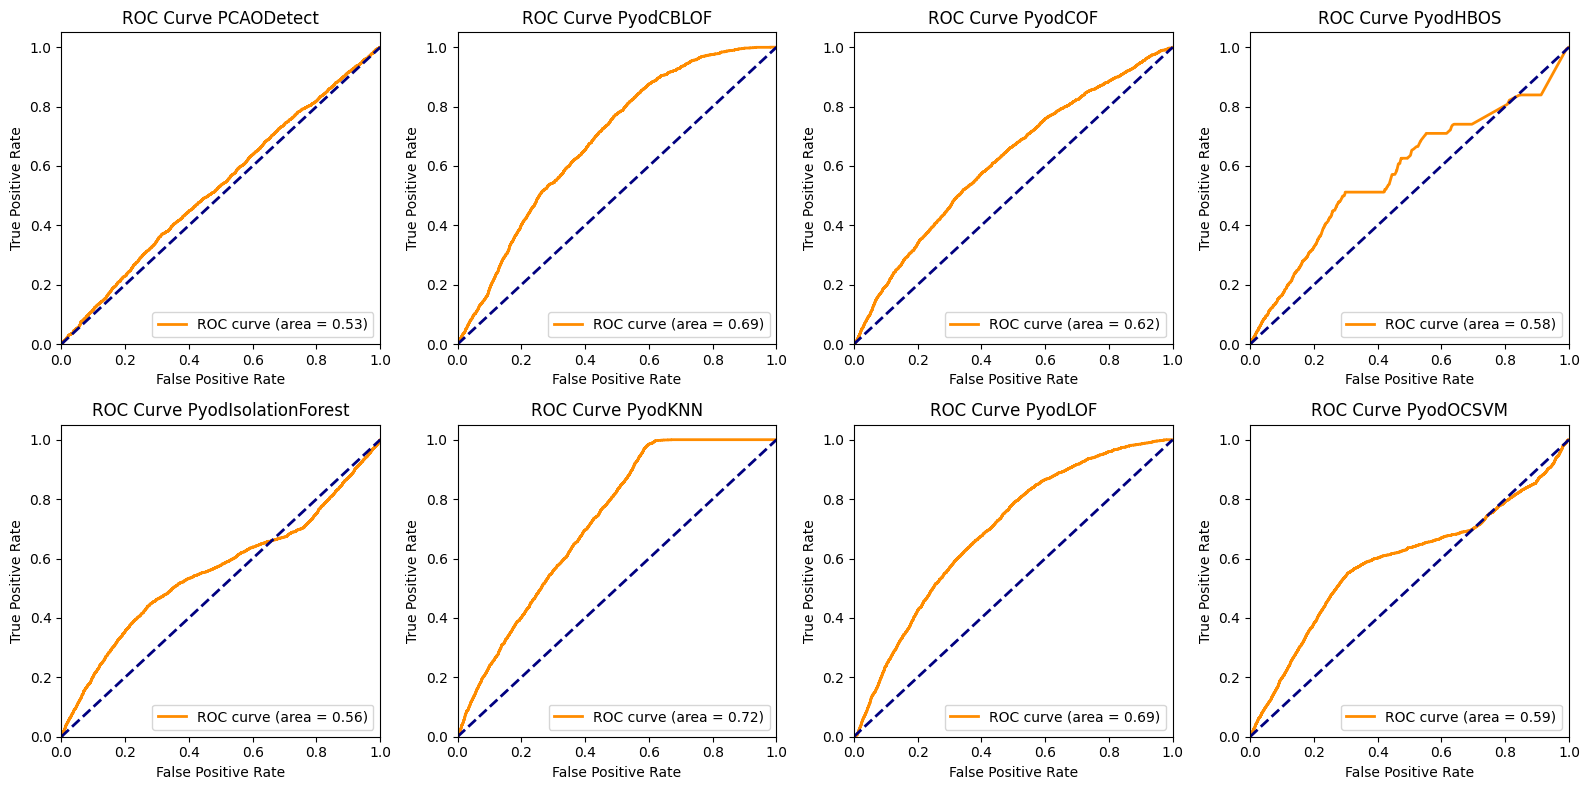


... Processing Occupancy ...
Accuracy Score:  0.6244087038789026
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       684
           1       0.46      0.42      0.44       373

    accuracy                           0.62      1057
   macro avg       0.58      0.58      0.58      1057
weighted avg       0.62      0.62      0.62      1057

PCAODetect ROC:0.5976, precision @ rank n:0.445, execution time: 0.0389s
Accuracy Score:  0.5975609756097561
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       689
           1       0.43      0.45      0.44       377

    accuracy                           0.60      1066
   macro avg       0.56      0.56      0.56      1066
weighted avg       0.60      0.60      0.60      1066

PyodCBLOF ROC:0.6364, precision @ rank n:0.4271, execution time: 0.0828s
Accuracy Score:  0.5196998123827392
              precision    recall  f1-score   support

       

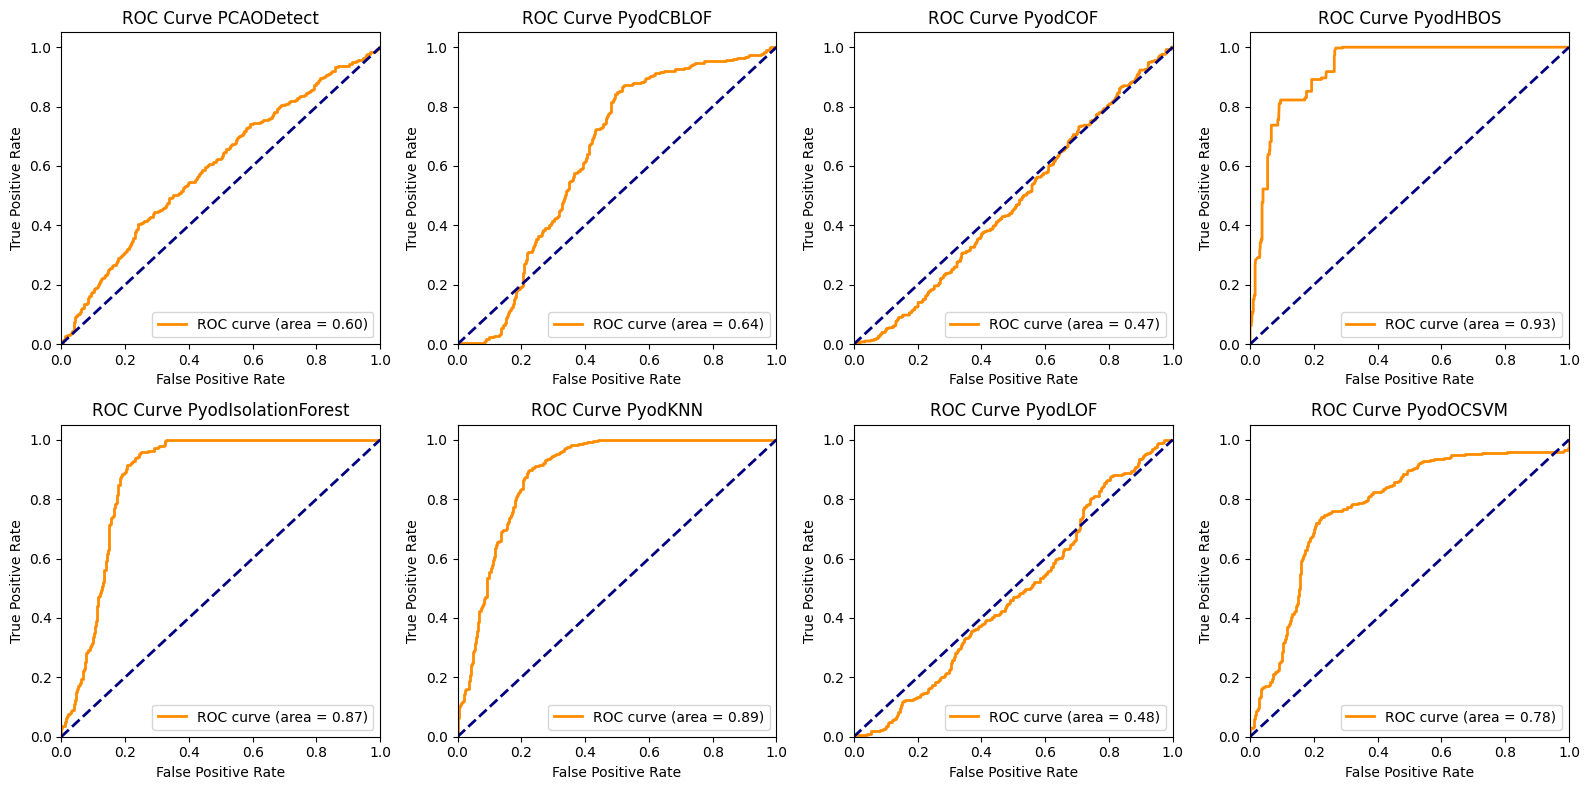


... Processing CalIt ...
Accuracy Score:  0.905829596412556
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1911
           1       0.10      0.11      0.10        96

    accuracy                           0.91      2007
   macro avg       0.53      0.53      0.53      2007
weighted avg       0.91      0.91      0.91      2007

PCAODetect ROC:0.6348, precision @ rank n:0.0938, execution time: 0.0264s
Accuracy Score:  0.9270833333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1920
           1       0.27      0.32      0.30        96

    accuracy                           0.93      2016
   macro avg       0.62      0.64      0.63      2016
weighted avg       0.93      0.93      0.93      2016

PyodCBLOF ROC:0.8375, precision @ rank n:0.2917, execution time: 0.084s
Accuracy Score:  0.9241071428571429
              precision    recall  f1-score   support

           0

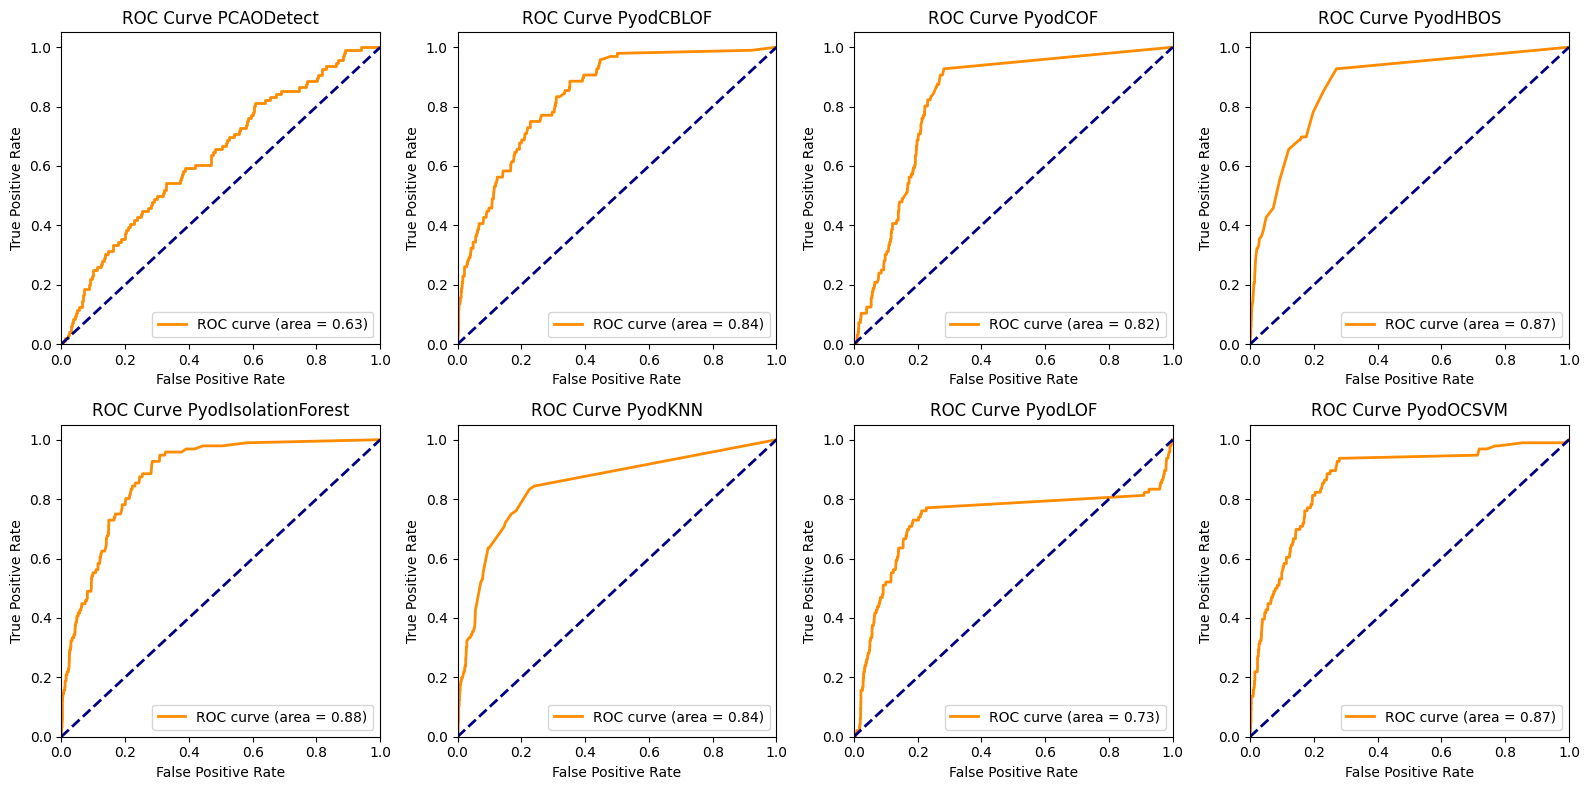


... Processing Exathlon ...
Accuracy Score:  0.9032327239586125
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17477
           1       0.23      0.23      0.23      1176

    accuracy                           0.90     18653
   macro avg       0.59      0.59      0.59     18653
weighted avg       0.90      0.90      0.90     18653

PCAODetect ROC:0.8136, precision @ rank n:0.2304, execution time: 0.5887s
Accuracy Score:  0.9958203836673454
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17486
           1       0.97      0.97      0.97      1176

    accuracy                           1.00     18662
   macro avg       0.98      0.98      0.98     18662
weighted avg       1.00      1.00      1.00     18662

PyodCBLOF ROC:0.9989, precision @ rank n:0.966, execution time: 1.1047s
Accuracy Score:  0.8850605508519988
              precision    recall  f1-score   support

        

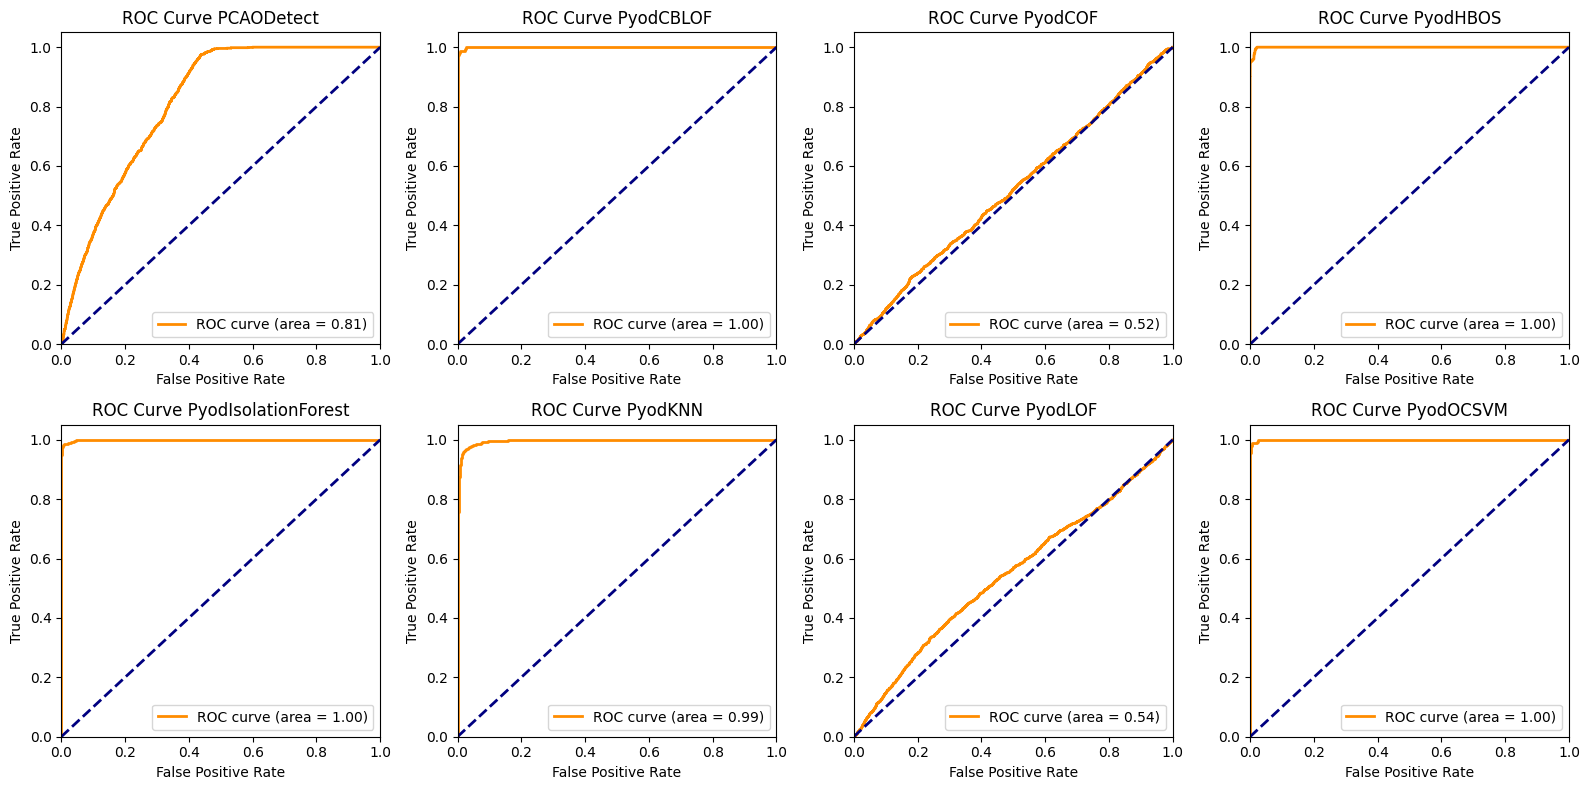

In [65]:
# Define nine outlier detection tools to be compared
# random_state = np.random.RandomState(42)
random_state = 42

df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'PCAODetect', 'PyodCBLOF', 'PyodCOF', 'PyodHBOS', 'PyodIsolationForest', 'PyodKNN',
              'PyodLOF', 'PyodOCSVM']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)
count = 0

for dataset in datasets:
    print("\n... Processing", problemname[count], '...')

    outliers_fraction = contamination[count]
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [problemname[count], dataset.shape[0], dataset.shape[1], outliers_percentage]
    prn_list = [problemname[count], dataset.shape[0], dataset.shape[1], outliers_percentage]
    time_list = [problemname[count], dataset.shape[0], dataset.shape[1], outliers_percentage]
    fpr_list = [problemname[count], dataset.shape[0], dataset.shape[1], outliers_percentage]
    tpr_list = [problemname[count], dataset.shape[0], dataset.shape[1], outliers_percentage]

    ###
    X = dataset.iloc[:, :-1]
    
    # y contains only the last column
    y = dataset.iloc[:, -1]
    ###
    
    #60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=random_state)

    # standardizing data for processing
    # X_train_norm, X_test_norm = standardizer(X_train, X_test)
    
    # Assuming X_train and X_test are your datasets
    scaler = StandardScaler()
    
    # Standardize the training data
    X_train_norm = scaler.fit_transform(X_train)
    
    # Use the same scaler to transform the test data
    X_test_norm = scaler.transform(X_test)
    
    classifiers = { 'PCAODetect': PCAODetectorSKI(
            contamination=outliers_fraction), 'PyodCBLOF': CBLOFSKI(
            contamination=outliers_fraction, check_estimator=False,
            random_state=random_state), 'PyodCOF': COFSKI(contamination=outliers_fraction), 'PyodHBOS': HBOSSKI(
            contamination=outliers_fraction), 'PyodIsolationForest': IsolationForestSKI(contamination=outliers_fraction,
            random_state=random_state), 'PyodKNN': KNNSKI(contamination=outliers_fraction), 'PyodLOF': LOFSKI(
            contamination=outliers_fraction), 'PyodOCSVM': OCSVMSKI(
            contamination=outliers_fraction)
    }

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_pred = clf.predict(X_test_norm)
        test_scores = clf.predict_score(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        # Optional: Align sizes if needed (this assumes test_pred is meant for the first few entries)
        # This is a crude way; please ensure it logically aligns with your data
        # if len(test_pred) < len(y_test):
        #     print("Aligning test_pred with y_test")
        #     y_test = y_test[:len(test_pred)]
        
        ###
        fpr, tpr, thresholds = roc_curve(y_test[:len(test_pred)], test_scores)
        print('Accuracy Score: ', accuracy_score(y_test[:len(test_pred)], test_pred))

        confusion_matrix(y_test[:len(test_pred)], test_pred)
        
        print(classification_report(y_test[:len(test_pred)], test_pred))
        ###
        
        roc = round(roc_auc_score(y_test[:len(test_pred)], test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test[:len(test_pred)], test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
            clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)

    # Create subplots (2x4 grid)
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    # Iterate over each subplot and plot the ROC curve
    keys_list = list(classifiers.keys())
    for i, ax in enumerate(axes.flat):
        fpr = fpr_list[i+4]
        tpr = tpr_list[i+4]
        roc = roc_list[i+4]
        key = keys_list[i]
        
        ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve {key}')
        ax.legend(loc="lower right")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    count += 1

In [66]:
print('Time complexity')
time_df

Time complexity


,Data,#Samples,# Dimensions,Outlier Perc,PCAODetect,PyodCBLOF,PyodCOF,PyodHBOS,PyodIsolationForest,PyodKNN,PyodLOF,PyodOCSVM
0,Genesis,16220,19,0.3083,0.5295,0.9913,21.6582,0.021,0.5191,2.3609,2.0952,3.9575
0,Daphnet,73600,10,6.9932,0.9688,1.8147,474.3412,0.0367,1.647,6.4774,7.664,71.6002
0,Occupancy,2665,6,36.4728,0.0389,0.0828,0.6931,0.003,0.1779,0.0521,0.0194,0.0773
0,CalIt,5040,3,4.0873,0.0264,0.084,0.9986,0.0025,0.1802,0.0975,0.0264,0.3365
0,Exathlon,46655,13,6.3187,0.5887,1.1047,135.0669,0.0117,1.0819,6.0318,6.9491,28.9237


In [67]:
print('ROC Performance')
roc_df

ROC Performance


,Data,#Samples,# Dimensions,Outlier Perc,PCAODetect,PyodCBLOF,PyodCOF,PyodHBOS,PyodIsolationForest,PyodKNN,PyodLOF,PyodOCSVM
0,Genesis,16220,19,0.3083,0.6107,0.9035,0.5558,0.6723,0.7173,0.6059,0.717,0.888
0,Daphnet,73600,10,6.9932,0.5292,0.6864,0.6163,0.5787,0.5569,0.7219,0.6918,0.5885
0,Occupancy,2665,6,36.4728,0.5976,0.6364,0.4744,0.9272,0.8749,0.8866,0.4788,0.7785
0,CalIt,5040,3,4.0873,0.6348,0.8375,0.8211,0.8702,0.88,0.8433,0.7306,0.866
0,Exathlon,46655,13,6.3187,0.8136,0.9989,0.5172,0.9993,0.9993,0.995,0.5431,0.9986


In [68]:
print('Precision @ n Performance')
prn_df

Precision @ n Performance


,Data,#Samples,# Dimensions,Outlier Perc,PCAODetect,PyodCBLOF,PyodCOF,PyodHBOS,PyodIsolationForest,PyodKNN,PyodLOF,PyodOCSVM
0,Genesis,16220,19,0.3083,0.0,0.0952,0.0,0.0,0.0,0.0,0.0,0.0952
0,Daphnet,73600,10,6.9932,0.0823,0.1232,0.1372,0.1218,0.14,0.1631,0.1487,0.1261
0,Occupancy,2665,6,36.4728,0.445,0.4271,0.3263,0.8245,0.7162,0.7162,0.3395,0.6605
0,CalIt,5040,3,4.0873,0.0938,0.2917,0.125,0.3778,0.3229,0.3563,0.2396,0.3229
0,Exathlon,46655,13,6.3187,0.2304,0.966,0.0782,0.9523,0.9685,0.8895,0.0884,0.9643
